In [1]:
"""Bike Store Analysis with SQL

This project analyzes a bike store dataset using SQL queries in Python.
The dataset includes information about brands, categories, customers, orders,
products, staff, stocks, and stores.

Project Structure:
1. Data Loading and Preparation
2. SQL Queries and Analysis
3. Visualization of Insights
4. Conclusion and Recommendations

"""

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Read CSV files into DataFrames
brands = pd.read_csv('/content/bike_store/brands.csv')
categories = pd.read_csv('/content/bike_store/categories.csv')
customers = pd.read_csv('/content/bike_store/customers.csv')
order_items = pd.read_csv('/content/bike_store/order_items.csv')
orders = pd.read_csv('/content/bike_store/orders.csv')
products = pd.read_csv('/content/bike_store/products.csv')
staffs = pd.read_csv('/content/bike_store/staffs.csv')
stocks = pd.read_csv('/content/bike_store/stocks.csv')
stores = pd.read_csv('/content/bike_store/bikestores.csv')

# Create SQLite connection and insert data
connection = sqlite3.connect('bike_store.db')

# Insert data into respective tables
brands.to_sql('brands', connection, if_exists='replace', index=False)
categories.to_sql('categories', connection, if_exists='replace', index=False)
customers.to_sql('customers', connection, if_exists='replace', index=False)
order_items.to_sql('order_items', connection, if_exists='replace', index=False)
orders.to_sql('orders', connection, if_exists='replace', index=False)
products.to_sql('products', connection, if_exists='replace', index=False)
staffs.to_sql('staffs', connection, if_exists='replace', index=False)
stocks.to_sql('stocks', connection, if_exists='replace', index=False)
stores.to_sql('stores', connection, if_exists='replace', index=False)


3

In [3]:
# Example SQL query: Analyzing customer demographics
query = """
SELECT
    customer_id,
    COUNT(order_id) AS total_orders,
    SUM(quantity * list_price * (1 - discount)) AS total_spent
FROM
    orders
INNER JOIN
    order_items USING (order_id)
GROUP BY
    customer_id
ORDER BY
    total_spent DESC;
"""

df = pd.read_sql_query(query, connection)
df.head()


,customer_id,total_orders,total_spent
0,94,10,34807.9392
1,10,11,33634.2604
2,75,7,32803.0062
3,6,11,32675.0725
4,16,12,31925.8857


In [8]:
# SQL query: Analyzing customer segmentation based on purchasing behavior
query = """
WITH customer_segments AS (
    SELECT
        customer_id,
        COUNT(DISTINCT order_id) AS total_orders,
        SUM(quantity * list_price * (1 - discount)) AS total_spent
    FROM
        orders
    INNER JOIN
        order_items USING (order_id)
    GROUP BY
        customer_id
)

SELECT
    CASE
        WHEN total_orders >= 2 THEN 'Repeat Buyer'
        ELSE 'One-Time Buyer'
    END AS customer_segment,
    COUNT(customer_id) AS customer_count,
    AVG(total_spent) AS avg_total_spent
FROM
    customer_segments
GROUP BY
    customer_segment;
"""

df_customer_segmentation = pd.read_sql_query(query, connection)
df_customer_segmentation


,customer_segment,customer_count,avg_total_spent
0,One-Time Buyer,1314,4563.441358
1,Repeat Buyer,131,12921.790938


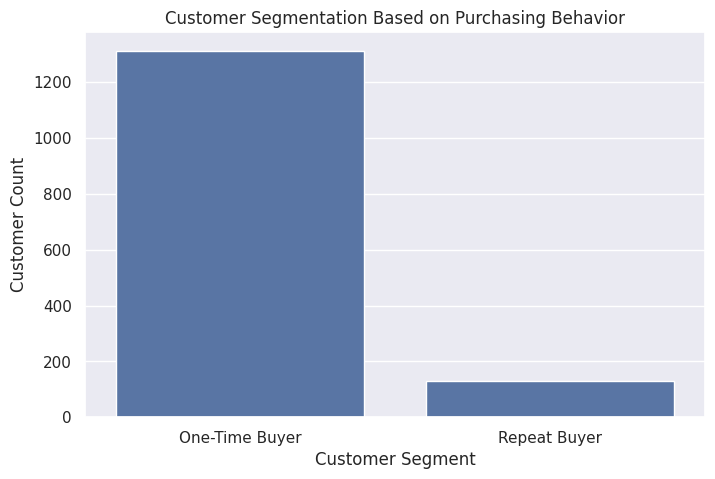

In [10]:
# Visualization: Customer segmentation based on purchasing behavior
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=df_customer_segmentation, x='customer_segment', y='customer_count', ax=ax)
ax.set_ylabel('Customer Count')
ax.set_xlabel('Customer Segment')
ax.set_title('Customer Segmentation Based on Purchasing Behavior')
plt.show()

In [9]:
# SQL query: Analyzing top-selling products
query = """
SELECT
    product_name,
    SUM(quantity) AS total_units_sold
FROM
    order_items
INNER JOIN
    products USING (product_id)
GROUP BY
    product_name
ORDER BY
    total_units_sold DESC
LIMIT 10;
"""

df_top_selling_products = pd.read_sql_query(query, connection)
df_top_selling_products


,product_name,total_units_sold
0,Electra Cruiser 1 (24-Inch) - 2016,296
1,Electra Townie Original 7D EQ - 2016,290
2,Electra Townie Original 21D - 2016,289
3,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,269
4,Surly Ice Cream Truck Frameset - 2016,167
5,Trek Slash 8 27.5 - 2016,154
6,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,154
7,Surly Straggler 650b - 2016,151
8,Electra Townie Original 7D - 2015/2016,148
9,Surly Straggler - 2016,147


<ipython-input-11-63ee6ec95902>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_selling_products, x='total_units_sold', y='product_name', palette='viridis', ax=ax)


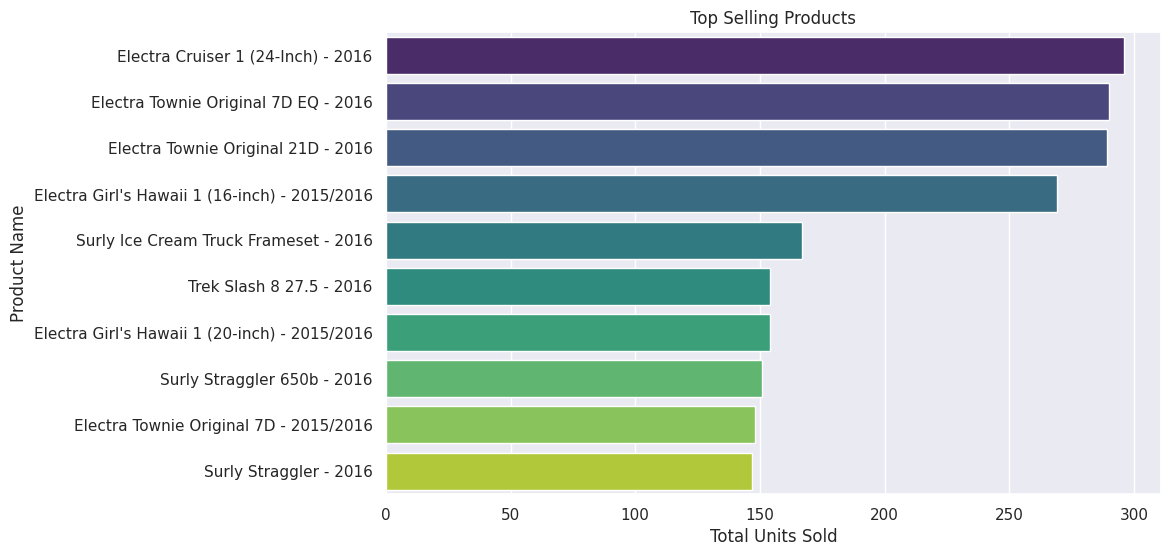

In [11]:
# Visualization: Top-selling products
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_top_selling_products, x='total_units_sold', y='product_name', palette='viridis', ax=ax)
ax.set_xlabel('Total Units Sold')
ax.set_ylabel('Product Name')
ax.set_title('Top Selling Products')
plt.show()

In [12]:
# SQL query: Analyzing customer demographics by state
query = """
SELECT
    state,
    COUNT(customer_id) AS customer_count,
    ROUND(AVG(total_spent), 2) AS avg_spent_per_customer
FROM (
    SELECT
        customers.customer_id,
        state,
        SUM(quantity * list_price * (1 - discount)) AS total_spent
    FROM
        customers
    INNER JOIN
        orders ON customers.customer_id = orders.customer_id
    INNER JOIN
        order_items ON orders.order_id = order_items.order_id
    GROUP BY
        customers.customer_id, state
)
GROUP BY
    state
ORDER BY
    customer_count DESC;
"""

df_customer_demographics = pd.read_sql_query(query, connection)
df_customer_demographics


,state,customer_count,avg_spent_per_customer
0,NY,1019,5118.50
1,CA,284,5654.31
2,TX,142,6109.45


<ipython-input-13-db560f237d8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_customer_demographics, x='state', y='customer_count', palette='coolwarm', ax=ax)


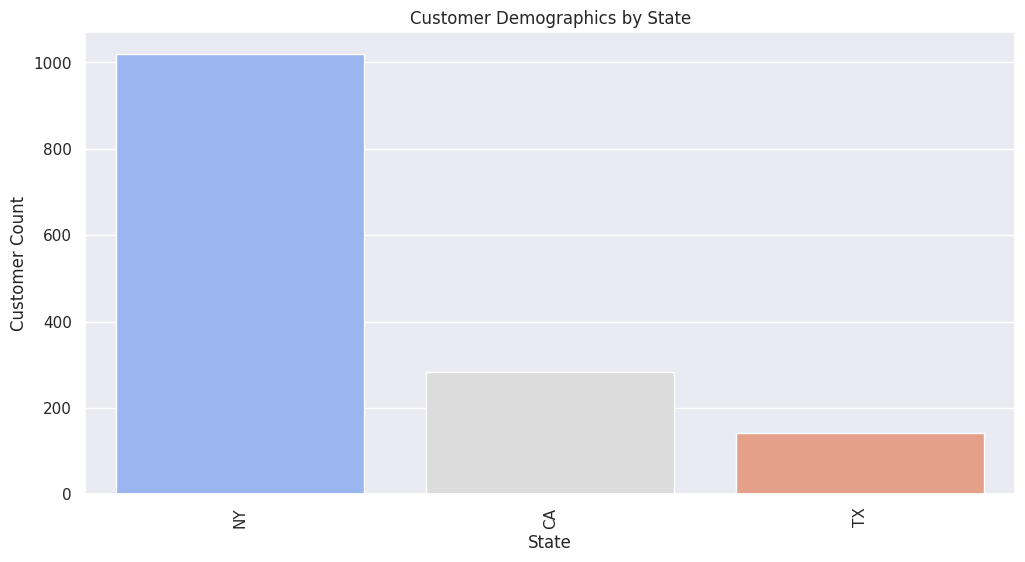

In [13]:
# Visualization: Customer demographics by state
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_customer_demographics, x='state', y='customer_count', palette='coolwarm', ax=ax)
ax.set_ylabel('Customer Count')
ax.set_xlabel('State')
ax.set_title('Customer Demographics by State')
plt.xticks(rotation=90)
plt.show()


In [14]:
# SQL query: Analyzing monthly sales trends
query = """
SELECT
    strftime('%Y-%m', order_date) AS month,
    SUM(quantity * list_price * (1 - discount)) AS total_sales
FROM
    orders
INNER JOIN
    order_items USING (order_id)
GROUP BY
    month
ORDER BY
    month;
"""

df_monthly_sales = pd.read_sql_query(query, connection)
df_monthly_sales


,month,total_sales
0,2016-01,215146.4241
1,2016-02,156112.3228
2,2016-03,180600.3285
3,2016-04,167144.0512
4,2016-05,205270.0091
5,2016-06,210562.1245
6,2016-07,199556.8089
7,2016-08,225657.3767
8,2016-09,273091.6097
9,2016-10,212078.0805


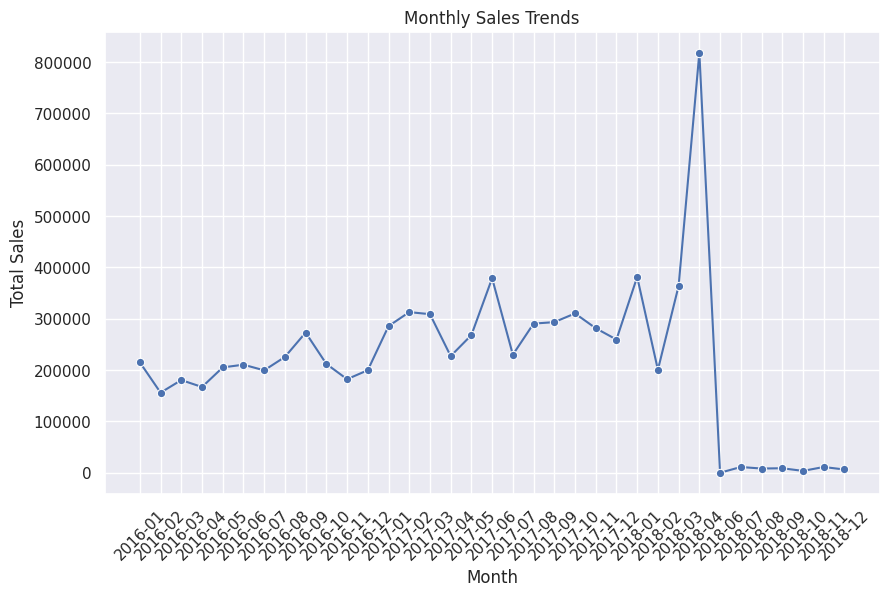

In [17]:
#Visualization: Monthly sales trends

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_monthly_sales, x='month', y='total_sales', marker='o', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.show()


In [19]:
# SQL query: Analyzing top performing stores by sales

query = """
SELECT
    s.store_name,
    SUM(oi.quantity * p.list_price * (1 - oi.discount)) AS total_sales
FROM
    stores s
INNER JOIN
    orders o ON s.store_id = o.store_id
INNER JOIN
    order_items oi ON o.order_id = oi.order_id
INNER JOIN
    products p ON oi.product_id = p.product_id
GROUP BY
    s.store_name
ORDER BY
    total_sales DESC;
"""

df_top_performing_stores = pd.read_sql_query(query, connection)
df_top_performing_stores


,store_name,total_sales
0,Baldwin Bikes,5.215751e+06
1,Santa Cruz Bikes,1.605823e+06
2,Rowlett Bikes,8.675422e+05


<ipython-input-21-dfbc8aaaf486>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_performing_stores, x='total_sales', y='store_name', palette='viridis', ax=ax)


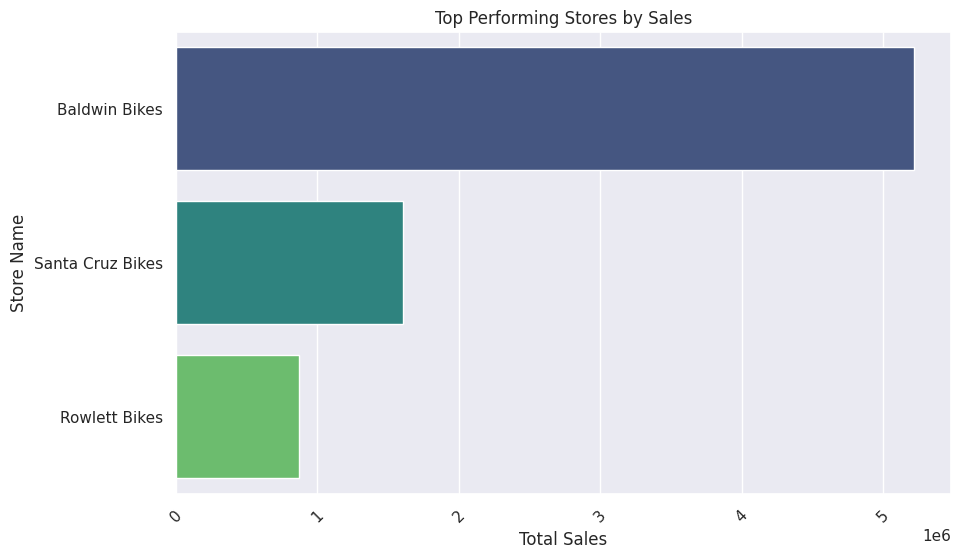

In [21]:
# Visualization: Top performing stores by sales

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_top_performing_stores, x='total_sales', y='store_name', palette='viridis', ax=ax)
ax.set_xlabel('Total Sales')
ax.set_ylabel('Store Name')
ax.set_title('Top Performing Stores by Sales')
plt.xticks(rotation=45)
plt.show()


In [26]:
# SQL query: Analyzing product sales performance

query = """
SELECT
    p.product_name,
    SUM(oi.quantity) AS total_units_sold,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_revenue
FROM
    products p
INNER JOIN
    order_items oi ON p.product_id = oi.product_id
GROUP BY
    p.product_name
ORDER BY
    total_revenue DESC
LIMIT 10;
"""

df_product_sales = pd.read_sql_query(query, connection)
df_product_sales


,product_name,total_units_sold,total_revenue
0,Trek Slash 8 27.5 - 2016,154,555558.6111
1,Trek Conduit+ - 2016,145,389248.7025
2,Trek Fuel EX 8 29 - 2016,143,368472.7294
3,Surly Straggler 650b - 2016,151,226765.5510
4,Trek Domane SLR 6 Disc - 2017,43,211584.6153
5,Surly Straggler - 2016,147,203507.6200
6,Trek Remedy 29 Carbon Frameset - 2016,125,203380.8701
7,Trek Powerfly 8 FS Plus - 2017,41,188249.6235
8,Trek Madone 9.2 - 2017,39,175899.6482
9,Trek Silque SLR 8 Women's - 2017,29,174524.7315


<ipython-input-31-5a522503c163>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_product_sales, x='total_units_sold', y='product_name', palette='viridis', ax=ax)


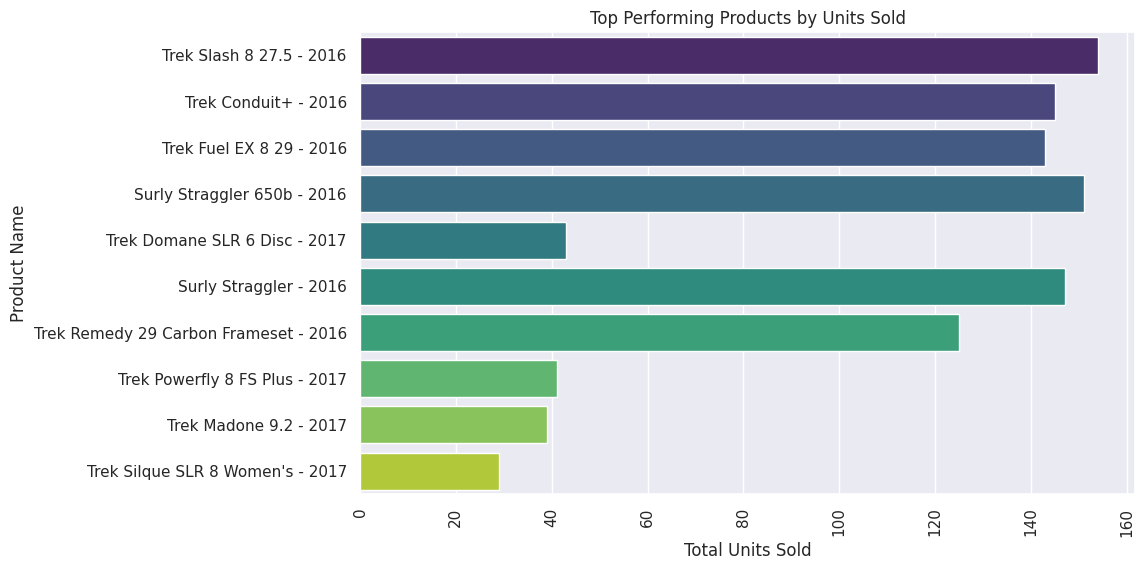

In [31]:
#Visualization: Top performing products by units sold

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_product_sales, x='total_units_sold', y='product_name', palette='viridis', ax=ax)
ax.set_xlabel('Total Units Sold')
ax.set_ylabel('Product Name')
ax.set_title('Top Performing Products by Units Sold')
plt.xticks(rotation=90)
plt.show()


In [29]:
#SQL query: Analyzing sales performance by category

query = """
SELECT
    c.category_name,
    SUM(oi.quantity) AS total_units_sold,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_revenue
FROM
    categories c
INNER JOIN
    products p ON c.category_id = p.category_id
INNER JOIN
    order_items oi ON p.product_id = oi.product_id
GROUP BY
    c.category_name
ORDER BY
    total_revenue DESC;
"""

df_sales_by_category = pd.read_sql_query(query, connection)
df_sales_by_category


,category_name,total_units_sold,total_revenue
0,Mountain Bikes,1755,2.715080e+06
1,Road Bikes,559,1.665098e+06
2,Cruisers Bicycles,2063,9.950326e+05
3,Electric Bikes,315,9.166848e+05
4,Cyclocross Bicycles,394,7.110118e+05
5,Comfort Bicycles,813,3.940201e+05
6,Children Bicycles,1179,2.921892e+05


<ipython-input-30-792adc74c99c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sales_by_category, x='total_revenue', y='category_name', palette='viridis', ax=ax)


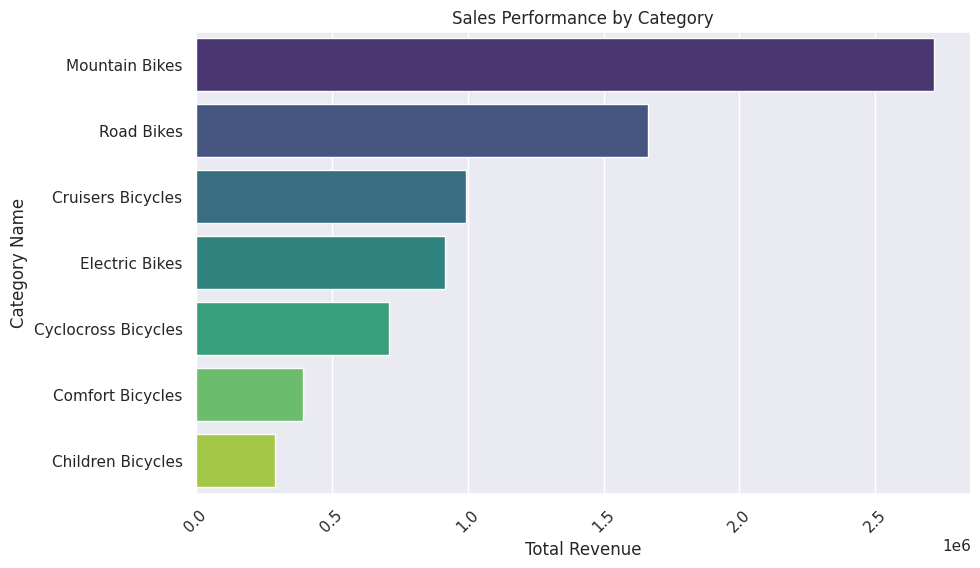

In [30]:
#Visualization: Sales performance by category

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_sales_by_category, x='total_revenue', y='category_name', palette='viridis', ax=ax)
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Category Name')
ax.set_title('Sales Performance by Category')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Conclusion and Recommendations:

# 1. Customer Segmentation:
# - The analysis identified two customer segments: Repeat Buyers and One-Time Buyers.
# - Repeat Buyers contribute significantly to total sales.
# - Marketing strategies should focus on retaining and incentivizing Repeat Buyers.

# 2. Top-Selling Products:
# - Certain products consistently rank among the top sellers.
# - Product assortments and inventory management should prioritize these items.
# - Consider promotions or discounts to boost sales of less popular products.

# 3. Customer Demographics:
# - Customer distribution varies across states.
# - Marketing campaigns and promotions can be tailored to specific regions.

# 4. Monthly Sales Trends:
# - Sales exhibit seasonal patterns or fluctuations.
# - Inventory management and staffing should account for peak and off-peak periods.

# 5. Top Performing Stores:
# - Some stores consistently generate higher sales than others.
# - Identify best practices from high-performing stores and implement them across all locations.
# - Consider resource allocation and marketing efforts to improve sales in underperforming stores.

# 6. Product Sales Performance:
# - Certain products contribute significantly to total revenue.
# - Focus on promoting and marketing these products.
# - Analyze reasons for low sales of other products and take corrective actions.

# 7. Sales Performance by Category:
# - Some categories generate higher revenue than others.
# - Allocate resources and marketing efforts accordingly.
# - Explore opportunities to expand or improve product offerings in high-performing categories.

# 8. Overall Recommendations:
# - Implement a customer loyalty program to reward and retain Repeat Buyers.
# - Continuously monitor sales data and customer behavior to identify emerging trends and adjust strategies accordingly.
# - Invest in staff training and development to improve customer service and sales performance.
# - Collaborate with suppliers to optimize inventory management and reduce stockouts.
# - Conduct regular performance reviews of stores and products to identify areas for improvement.
